## Libraries

In [1]:
import tempfile
import math
import os
from subprocess import call
import matplotlib.pyplot as plt
from f90nml import *
from array import *
import numpy as np
import pandas as pd 
import seaborn as sns
from statistics import *
import shutil
import sys
import time
from matplotlib.ticker import FormatStrFormatter

#read in printFolder, makeDefNameList, newFolder, deleteFolder, readOutput from coreFunctions.py
from coreFunctions import *

#read in plotting functionality from plottingFunctions.py
from plottingFunctions import *

call("rm -rf tmp*",shell=True)

dfModel = []#will contain output from our model

## Enter Custom Inputs, then Run the Model

Habitable Zone if pCO2=284ppm:
Minimum: 0.94 AU
Maximum: 1.02 AU
Max Pop: 37.68 billion, at Distance: 1

Equilibrium Reached at Temp=339.416. At time=94.0
Final Temp(K): 427.99
Final Temp(F): 310.71



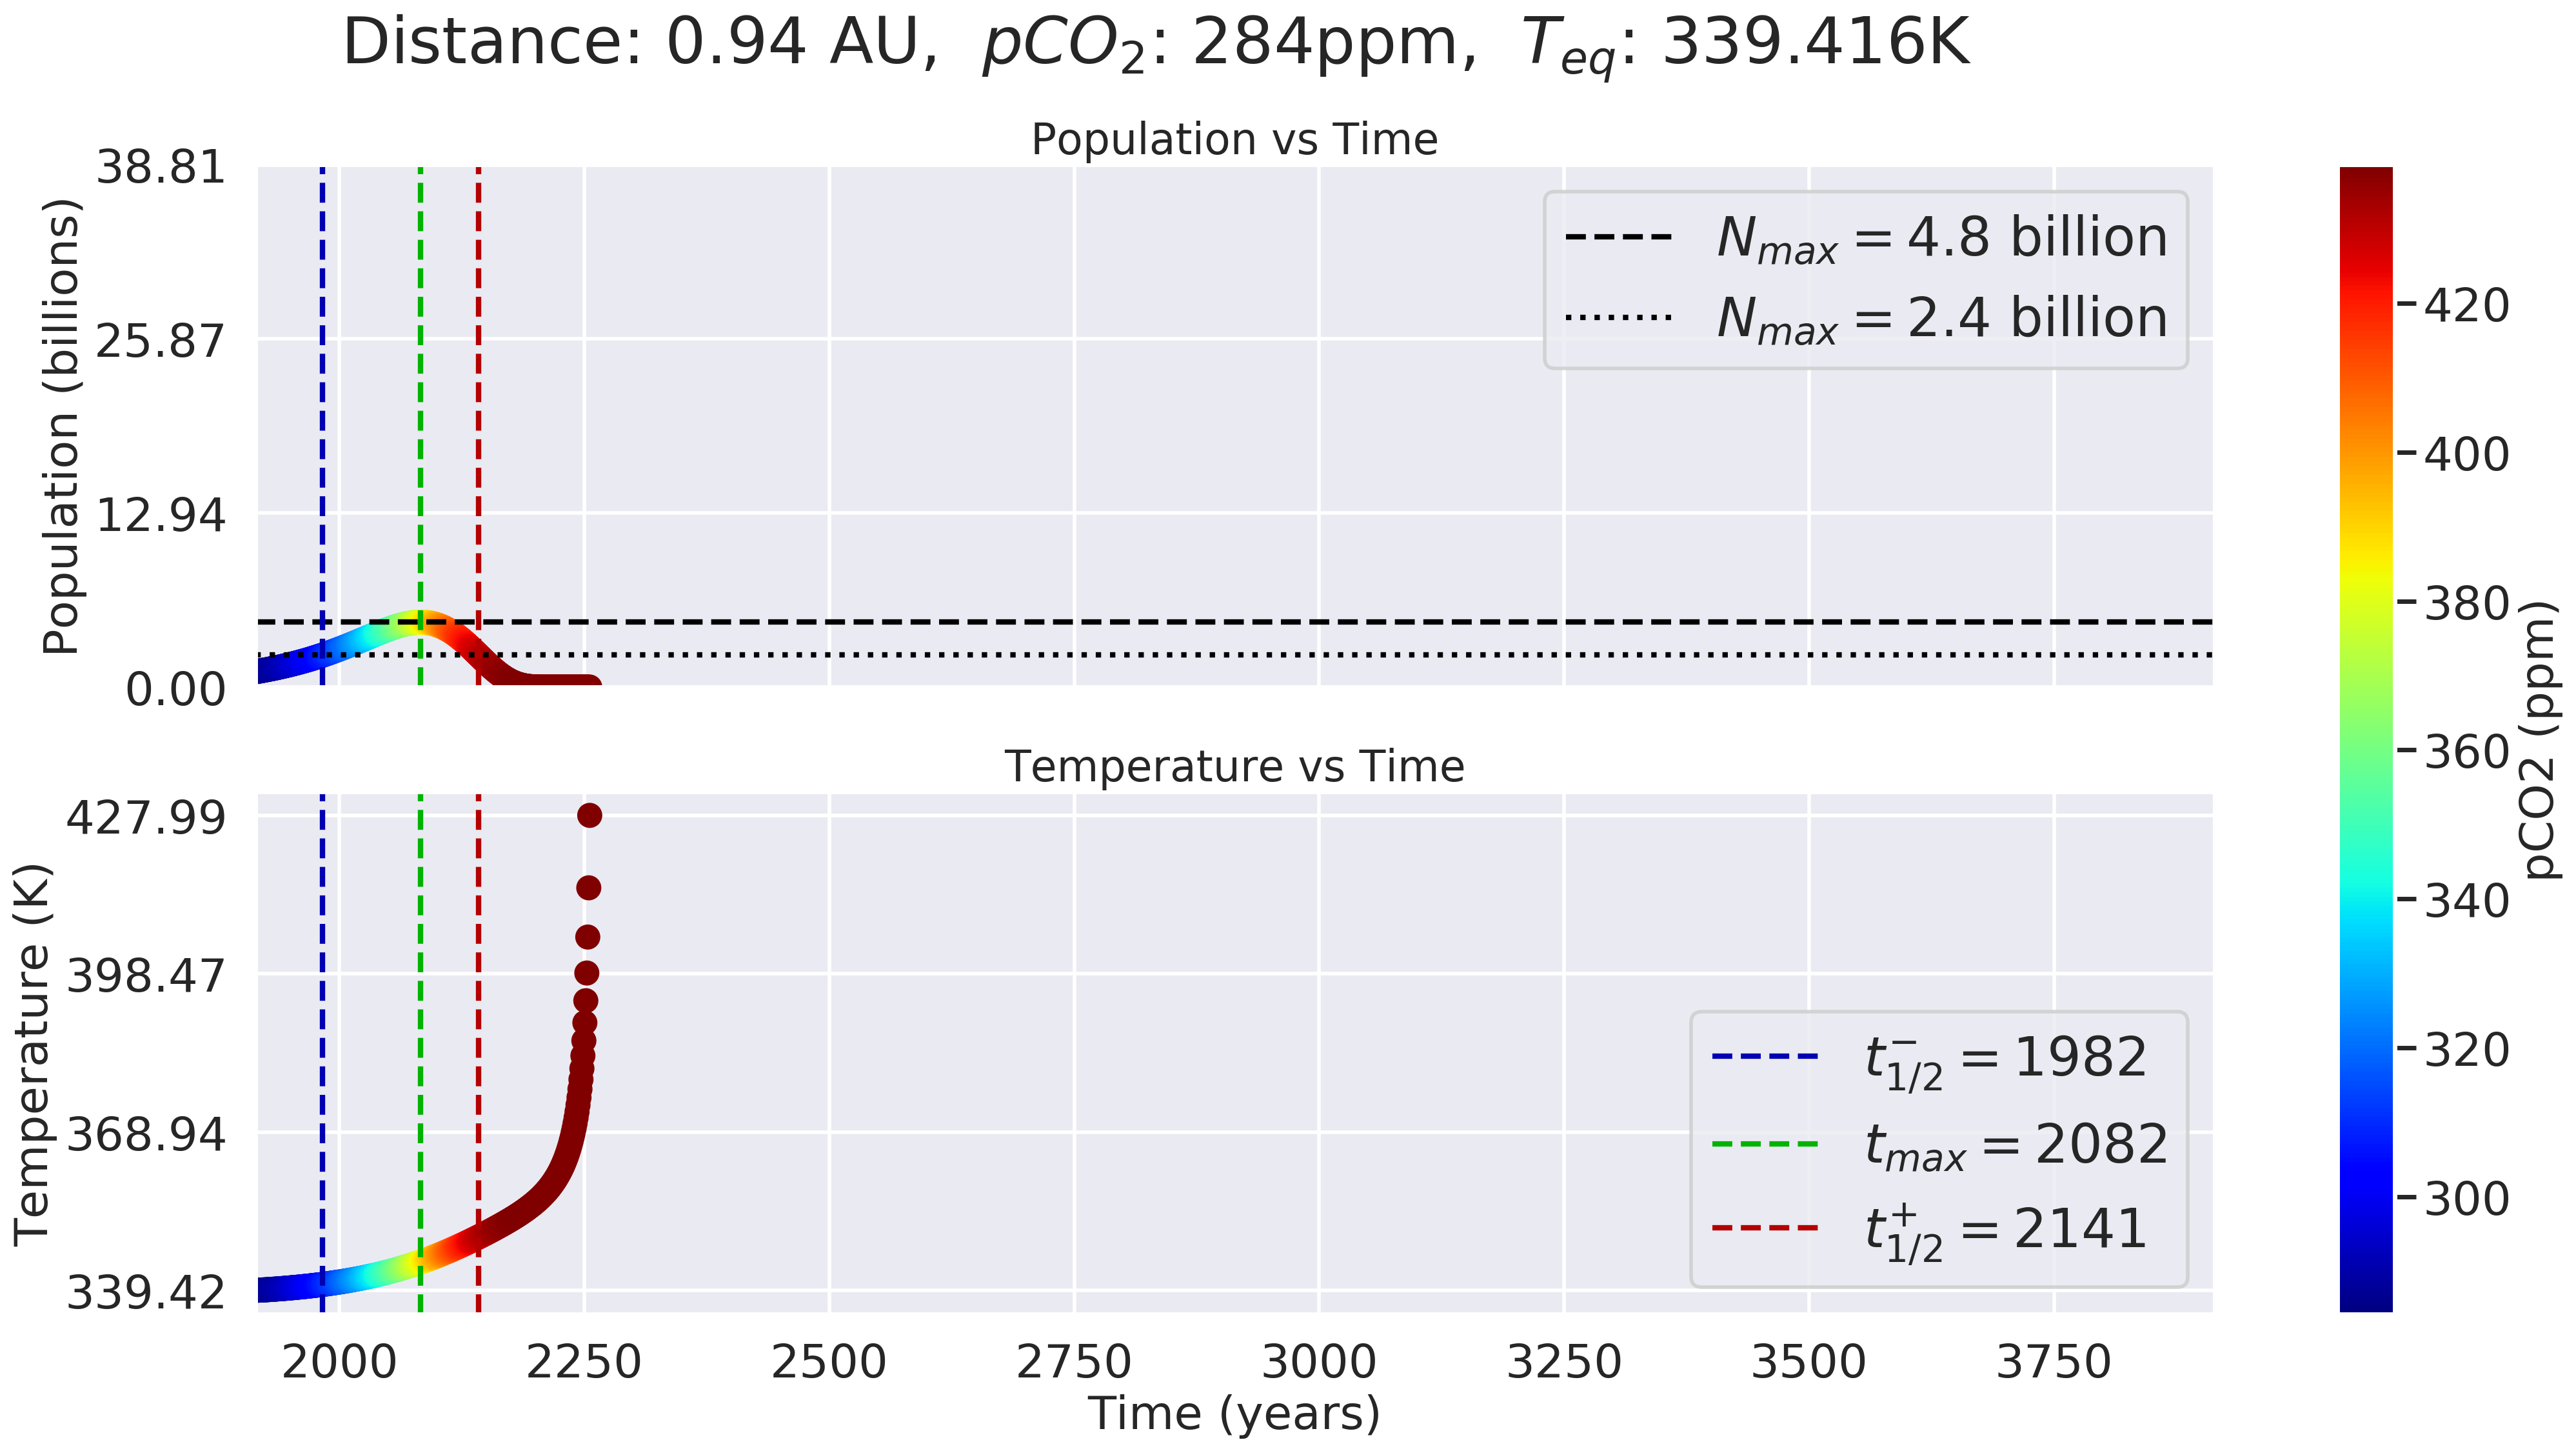

Equilibrium Reached at Temp=305.561. At time=38.0
Final Temp(K): 313.76
Final Temp(F): 105.1



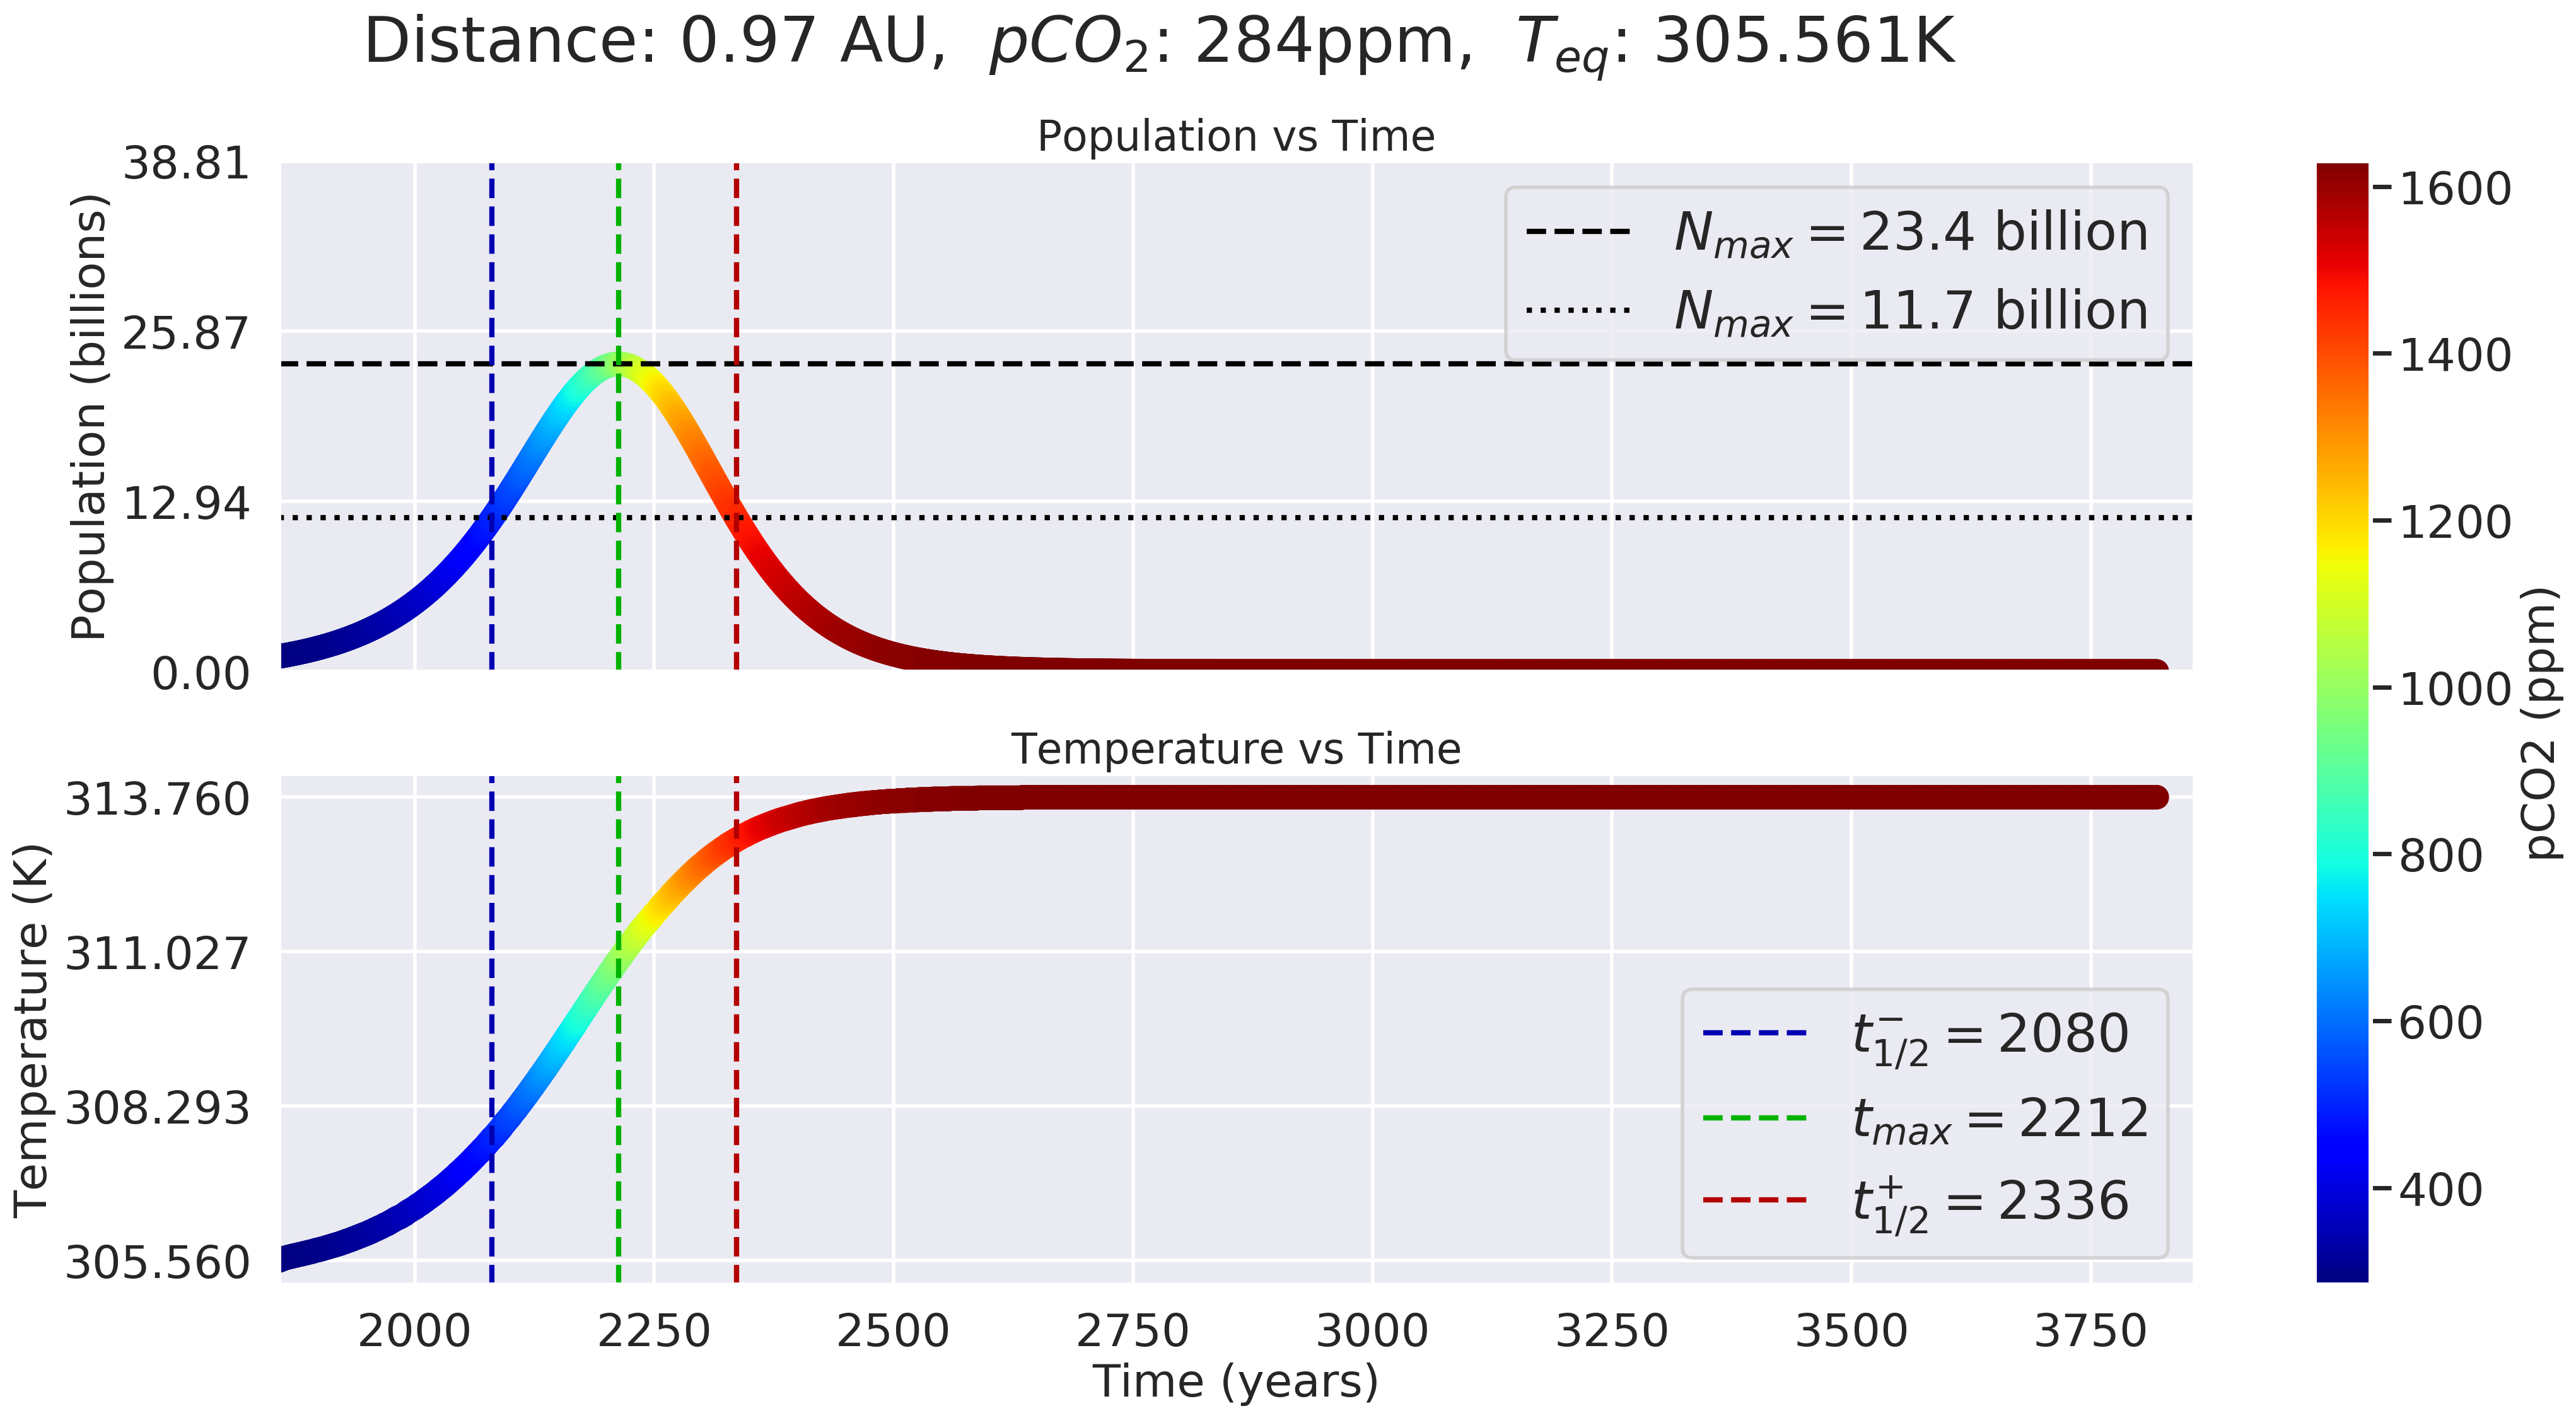

Equilibrium Reached at Temp=292.665. At time=29.0
Final Temp(K): 300.74
Final Temp(F): 81.66



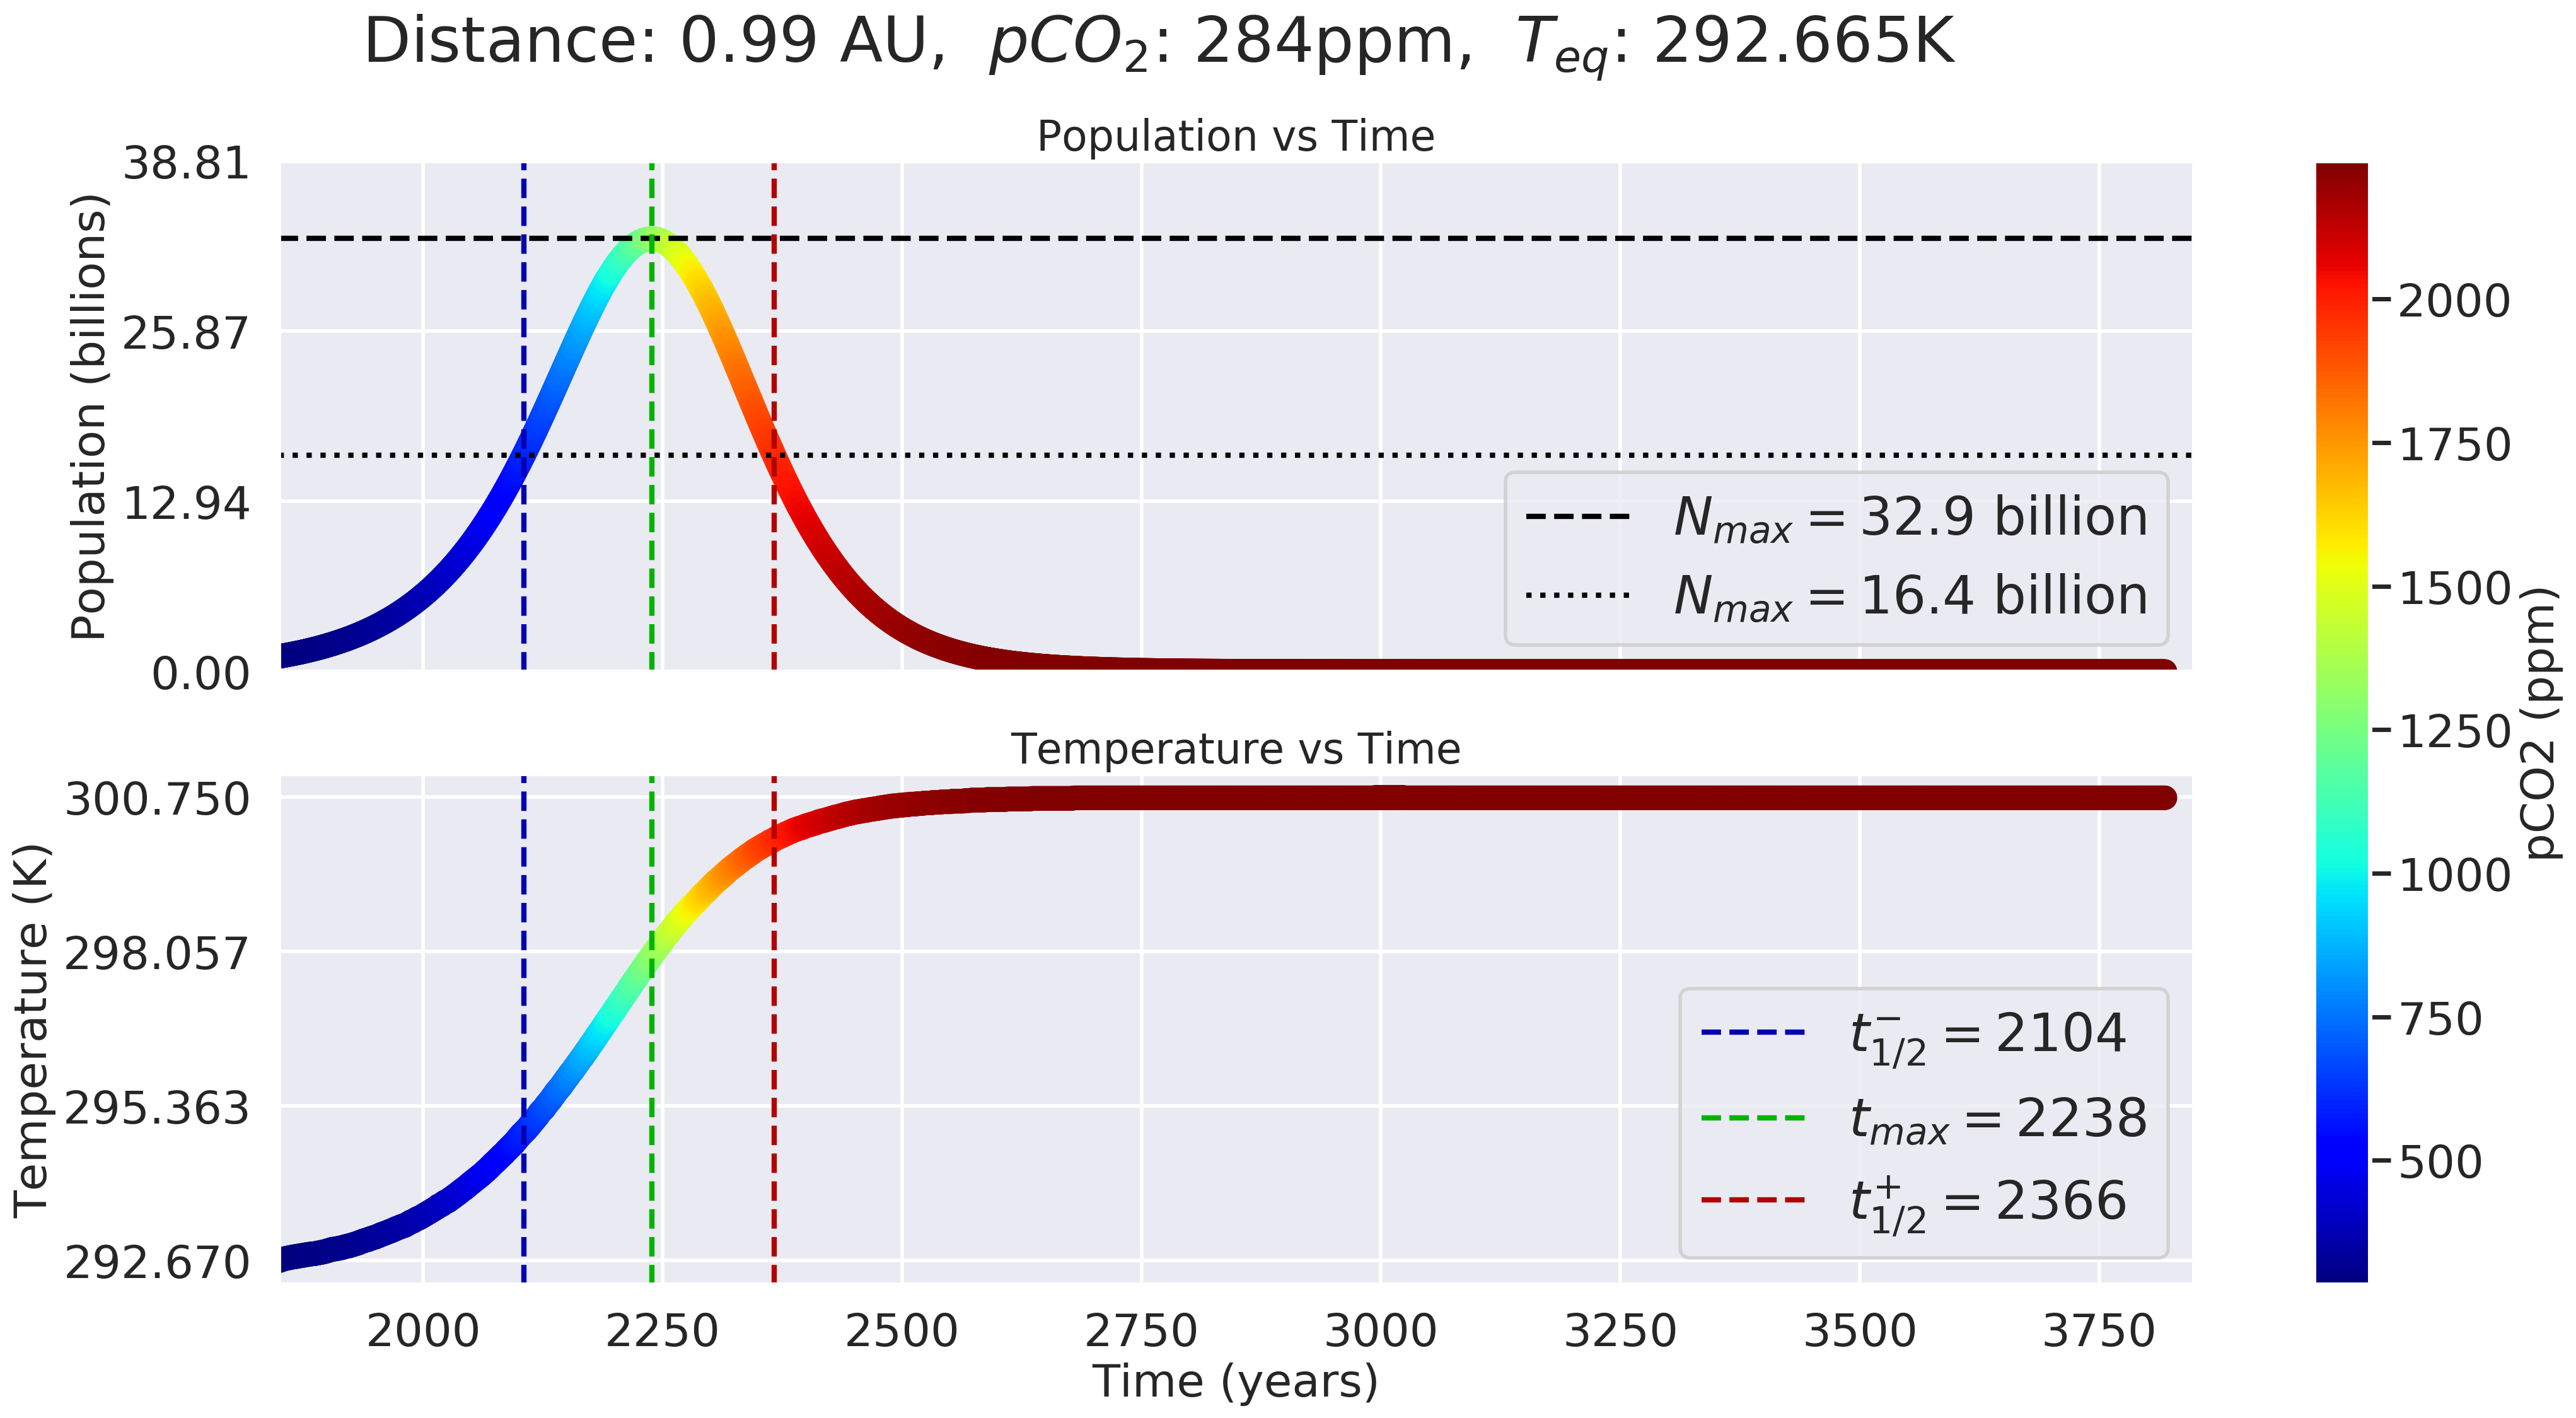

Equilibrium Reached at Temp=275.796. At time=28.0
Final Temp(K): 284.08
Final Temp(F): 51.67



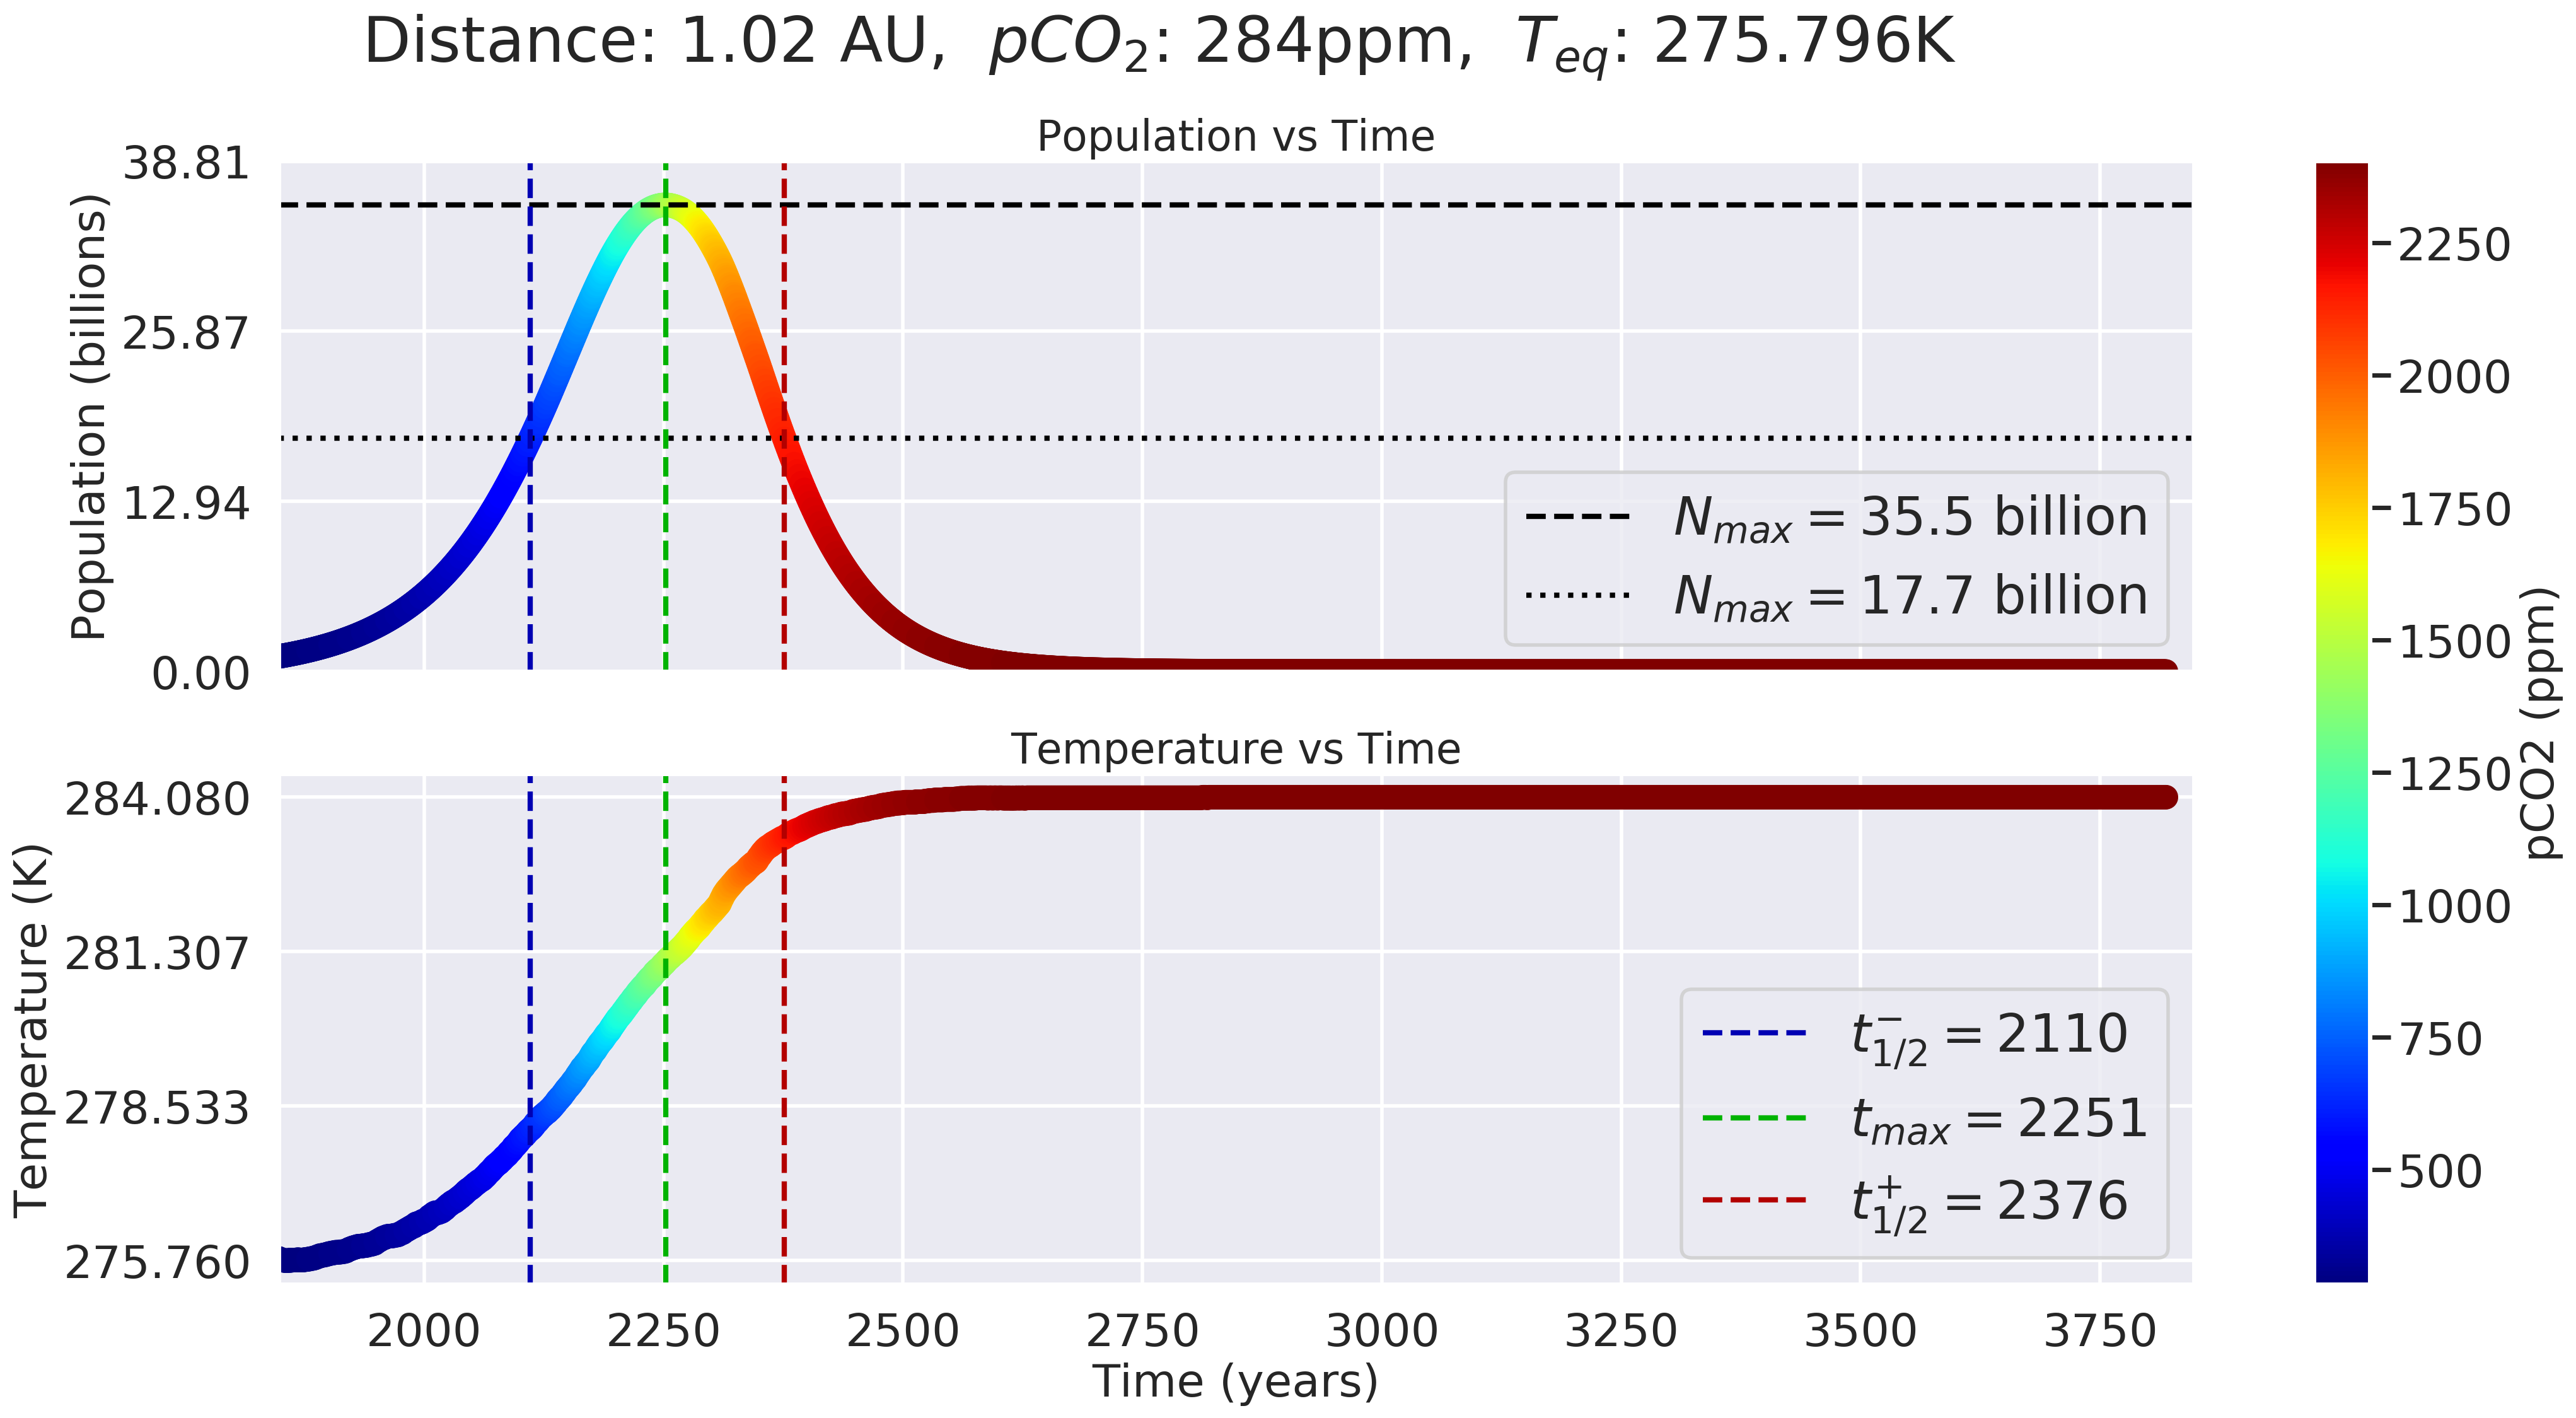

Elapsed Time: 47.5723819732666


In [2]:
nameList = makeDefNamelist() #make namelist
nameList['ebm']['lverbose']=False #controls terminal output, used for debugging
nameList['ebm']['rBirth']=.0252;
nameList['ebm']['rDeath']=.0142857;
nameList['ebm']['rco2']=2.00e-4;
life=False;

start = time.time()

#specify inputs
multP=1
runTime=2000#change runtime(years)
coupled=True
saveName=1;#name of file
fullMaxPop=0
save=True;#save the file
counter=1
FMP = 1;
#for i in np.linspace(284*1000,284*.1,5):#pco2 loops
newPco2=284#change pco2 (ppm)
newA = .9#change distance (AU)
#run the program
dA=.01
#minA, maxA, fullMaxPop, fullMaxPopA = habitableZone(nameList,newPco2,newA,runTime,dA)
minA=.94
maxA=1.02
fullMaxPop=37.68
fullMaxPopA=1

print("Habitable Zone if pCO2="+str(round(newPco2)) + "ppm:")
print("Minimum: "+str(minA) + " AU")
print("Maximum: "+str(maxA)+" AU")
print("Max Pop: " + str(fullMaxPop)+ " billion" + ", at Distance: " + str(round(fullMaxPopA,2))+"\n" )
for i in np.linspace(minA,maxA,4):#population loops
#calculate inputs
    newA = round(i,2) #change distance (AU)
    nameList['ebm']['coupled']=coupled
    nameList['ebm']['pco20']=newPco2/10**6#convert pco2 to bars
    nameList['ebm']['relsolcon']=newA**-2 #inverse square law for solar flux
    nameList['ebm']['runTime'] = runTime#change runtime
#run program
    dfModel, finalavgtemp, eqTime, eqTemp, equilibrium = runProgram("driver.exe",nameList,True)#False=no output
#plot the results
    if coupled:
        popStats = analyzeRun(dfModel,nameList,False)#True Prints Dictionary Values
        popStats['maxPopPlot']=fullMaxPop+(3/100)*fullMaxPop#maximum population range
        inputs=[newA,newPco2,runTime]
        if equilibrium: plotModelOutput(dfModel,inputs,eqTime,eqTemp,popStats,save,saveName)#plot the output of our model, colored by pco2 
        saveName+=1
end = time.time()
print( "Elapsed Time: " + str(end-start))
call("echo End of Python Notebook Reached", shell=True);

In [3]:
print(round(.6777777777,2))

0.68


## Model Analysis

In [4]:
#dfTemp = pd.read_csv('anomaly.csv');#data from NASA GISS: https://data.giss.nasa.gov/gistemp/graphs_v4/
#dfPopCo2 = pd.read_csv('world_stats.csv');#data from Frank, Adam, and Woodruff Sullivan.
#plotModelInput(nameList)#plot the temperature dependence on the growth rate
#plotTruePopCo2(dfPopCo2) #plot true population values vs pco2
#compareModelOutput(dfModel,dfTemp,dfPopCo2)#compare the models output to true data